# Scikit-Learn and Linear Regression

[scikit-learn](http://scikit-learn.org/) is the standard machine learning package in Python. It brings many different machine learning methods (including linear regression, $k$-nearest neighbors, and decision trees) all under one common API.

In this workbook, you will learn the scikit-learn API and use it to fit linear regression models. We'll use the Harris Bank data set.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/data/harris.csv")

## The scikit-learn API and Simple Linear Regression

Once you've learned how to fit one machine learning model with scikit-learn, you've learned to fit them all. The steps are the same for any machine learning model.

1. Specify a model.
2. Fit the model to training data by calling `model.fit(X, y)`, where `X` is a "matrix" of inputs/predictors and `y` is a "vector" of corresponding outputs/responses/decisions.
3. Call `model.predict(X_new)` to predict the outputs for a new set of inputs `X_new`. `X_new` must have the same columns as `X`.

Now let's use this API to add the best-fit line to the scatterplot of `Exper` and `Bsal`.

**Step 1.** Specify a model.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**Step 2.** Fit the model to the training data. 

Notice the double brackets in `data[["Exper"]]`. This is because the input `X` has to be a matrix (i.e., a DataFrame), even if there is only a single variable.

In [4]:
model.fit(X=data[["Exper"]], y=data["Bsal"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the model has been fit, we can extract the fitted slope and intercept.

In [5]:
model.coef_, model.intercept_

(array([ 1.30094385]), 5289.0216755830697)

**Step 3.** To plot the best-fit line, we could use the slope and intercept calculated above. But there is another way that generalizes better to more complex machine learning models. We can simply predict the value of `y` over a grid of `X` values using the fitted model.

In [6]:
# Remember: X_new should look like the original X matrix
X_new = pd.DataFrame({
        "Exper": np.arange(0, 400)
    })

y_new = model.predict(X_new)

Now you have all the pieces to make a scatterplot of `Exper` and `Bsal`, with the best-fit line superimposed.

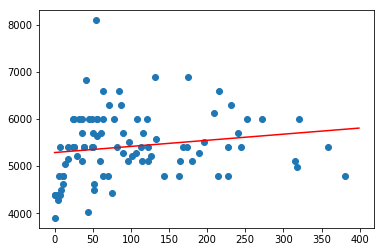

In [7]:
x = data['Exper']
y = data['Bsal']
plt.scatter(x,y)
plt.plot(X_new, y_new, color='red')

## Multiple Linear Regression

Linear regression can be generalized to more than one variable. We assume that the decision $f({\bf x})$ is based on a linear combination of $p$ input variables:

$$ f({\bf x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p, $$

and we find the coefficients $\beta_j$ that minimize the discrepancy between $y$ and $f({\bf x})$ on our training data.

Fitting such a model in scikit-learn is just as easy, even though visualizing the fitted model is no longer straightforward.

**Exercise.** Fit a machine learning model to predict `Bsal`, given `Exper`, `Age`, and `Educ`. Then, use your model to predict the starting salary for a 24-year old with 15 years of education and 3 years of experience.

In [8]:
# YOUR CODE HERE.
model = LinearRegression()

model.fit(data[['Exper', 'Age', 'Educ']], data['Bsal'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X_new = pd.DataFrame({
        'Exper':[36],
        'Age':[24*12],
        'Educ':[15],
    })

model.predict(X_new[['Exper', 'Age', 'Educ']])

array([ 5695.9314019])

In [10]:
X_new[['Exper', 'Age', 'Educ']]

,Exper,Age,Educ
0,36,288,15


In [11]:
model.predict([[36, 24*12, 15]])

array([ 5695.9314019])

In [12]:
data = pd.read_csv("/data/automobile.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [23]:
data_clean = data[~data['price'].isnull()]

In [24]:
model = LinearRegression()

In [29]:
model.fit(data_clean[['length', 'width', 'height']], data_clean['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
model.coef_

array([  219.94408381,  1956.14680194,  -618.82490275])

In [31]:
data[data['make'] == 'audi']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160.0,5500.0,16,22,NaN


In [36]:
data[data['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [45]:
idx = 129
model.predict([[data.loc[idx]['length'], data.loc[idx]['width'], data.loc[idx]['height']]])

array([ 28099.07140589])